In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import colors

from py_files.plot_naccidents_per_year import *
from  py_files.plot_traffic_per_year import *
from  py_files.plot_kind_of_vehicle_per_year import *

In [2]:
naccidents_per_year_out = naccidents_per_year()


reading files...


 36%|███▌      | 205444/570011 [00:00<00:00, 2054437.06it/s]

computing...


100%|██████████| 464697/464697 [00:00<00:00, 2001380.56it/s]


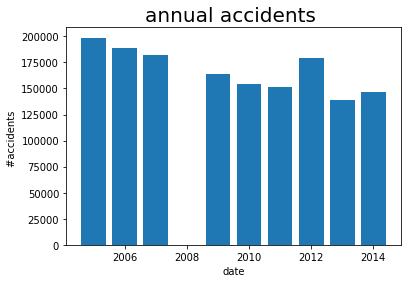

In [3]:
plt.bar(list(naccidents_per_year_out.keys()),
        list(naccidents_per_year_out.values()))
plt.xlabel('date')
plt.ylabel('#accidents ')
plt.title('annual accidents ', fontsize=20)
plt.show()

In [4]:
traffic_per_year_out = traffic_per_year()

reading files...


  0%|          | 427/275385 [00:00<01:04, 4268.78it/s]

computing...


100%|██████████| 275385/275385 [01:29<00:00, 3092.39it/s]


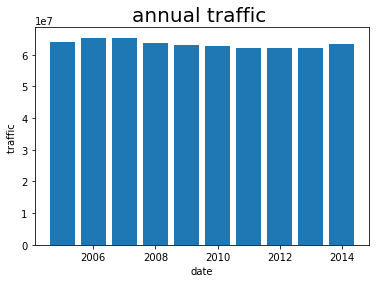

In [5]:
plt.bar(list(traffic_per_year_out.keys()),
        list(traffic_per_year_out.values()))
plt.xlabel('date')
plt.ylabel('traffic ')
plt.title('annual traffic ', fontsize=20)
plt.show()

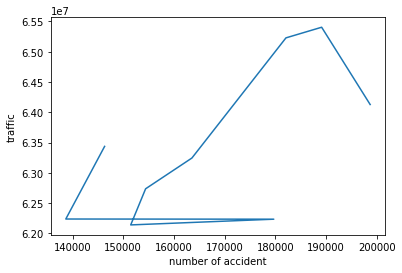

In [6]:
y2008removed = dict(traffic_per_year_out)
del y2008removed[2008]
plt.plot(list(naccidents_per_year_out.values()),list(y2008removed.values()),label ='traffic and number of accident ')

plt.xlabel('number of accident')
plt.ylabel('traffic')

plt.show()

In [2]:
kind_of_vehicle_per_year_out = kind_of_vehicle_per_year()

reading files...


  0%|          | 225/275385 [00:00<02:02, 2244.31it/s]

computing...


100%|██████████| 275385/275385 [01:55<00:00, 2394.17it/s]


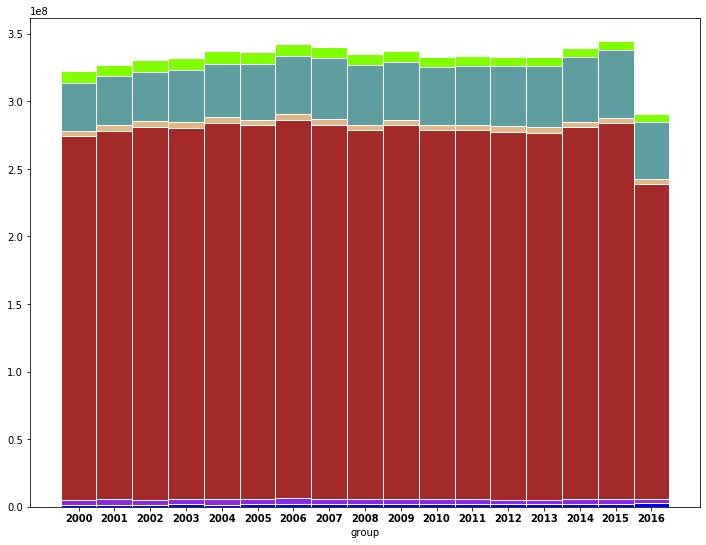

In [21]:
# y-axis in bold
rc('figure',figsize=(12, 9))
bar_width = 5
newdic = {}
# Values of each group
for year in kind_of_vehicle_per_year_out:
    for key in kind_of_vehicle_per_year_out[year]:
        if (key not in newdic):
            newdic[key] = {}
        newdic[key][year] = kind_of_vehicle_per_year_out [year][key]
        
bars = []
for i,item in enumerate(newdic):
    bars.append(list(newdic[item].values()))

padding = [np.zeros(len(bars[0]))]
for i,item in enumerate(bars):
    if i == len(bars):
        continue
    padding.append(np.add(padding[i], bars[i]).tolist())

# The position of the bars on the x-axis
x_position = bar_width*np.arange(17)
 
# Names of group and bar width
names = list(kind_of_vehicle_per_year_out.keys())

h_colors = list(colors.cnames.items())

# Create brown bars
for index, year in enumerate(bars):
    plt.bar(x_position, year, bottom=padding[index],
            color=h_colors[index+9][1], edgecolor='white', width=bar_width)

# Custom X axis
plt.xticks(x_position, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()